#LGBM & XGBM

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [ ]:
import pandas as pd

# Load train dataset
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

In [ ]:
df_train.head()
df_train.info()

df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
# Impute missing values in training data
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train['Cabin'].fillna('Unknown', inplace=True)

# Impute missing values in test data
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)
df_test['Cabin'].fillna('Unknown', inplace=True)


In [ ]:
# Encode categorical variables
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)


In [ ]:
# Align test dataset columns with training dataset columns
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)


In [ ]:
from sklearn.model_selection import train_test_split

X_train = df_train.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y_train = df_train['Survived']

# X_test for prediction will be the test dataset


In [ ]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Align test dataset columns with training dataset columns
# Drop columns not present in both datasets
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
print("X_train columns:", X_train.columns.tolist())
print("df_test columns:", df_test.columns.tolist())


X_train columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Cabin_A14', 'Cabin_A16', 'Cabin_A19', 'Cabin_A20', 'Cabin_A23', 'Cabin_A24', 'Cabin_A26', 'Cabin_A31', 'Cabin_A32', 'Cabin_A34', 'Cabin_A36', 'Cabin_A5', 'Cabin_A6', 'Cabin_A7', 'Cabin_B101', 'Cabin_B102', 'Cabin_B18', 'Cabin_B19', 'Cabin_B20', 'Cabin_B22', 'Cabin_B28', 'Cabin_B3', 'Cabin_B30', 'Cabin_B35', 'Cabin_B37', 'Cabin_B38', 'Cabin_B39', 'Cabin_B4', 'Cabin_B41', 'Cabin_B42', 'Cabin_B49', 'Cabin_B5', 'Cabin_B50', 'Cabin_B51 B53 B55', 'Cabin_B57 B59 B63 B66', 'Cabin_B58 B60', 'Cabin_B69', 'Cabin_B71', 'Cabin_B73', 'Cabin_B77', 'Cabin_B78', 'Cabin_B79', 'Cabin_B80', 'Cabin_B82 B84', 'Cabin_B86', 'Cabin_B94', 'Cabin_B96 B98', 'Cabin_C101', 'Cabin_C103', 'Cabin_C104', 'Cabin_C106', 'Cabin_C110', 'Cabin_C111', 'Cabin_C118', 'Cabin_C123', 'Cabin_C124', 'Cabin_C125', 'Cabin_C126', 'Cabin_C128', 'Cabin_C148', 'Cabin_C2', 'Cabin_C22 C26', 'Cabin_C23 C25 C27', 'Cabin_C30', 'Cabin_C32', 'C

In [ ]:
# Drop columns not present in the test dataset
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Add missing columns with default values

# Drop extra columns in the test dataset
extra_cols = set(df_test.columns) - set(X_train.columns)
df_test = df_test.drop(columns=extra_cols)

# Reindex to ensure column order matches
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Drop columns that should be removed if they are present in X_train
cols_to_drop = ['PassengerId', 'Name', 'Ticket']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = df_test.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb

# Load datasets
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

# Preprocess training data
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train['Cabin'].fillna('Unknown', inplace=True)
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)

# Preprocess test data
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)
df_test['Cabin'].fillna('Unknown', inplace=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)

# Align test dataset columns with training dataset columns
# Add missing columns in test data with default value 0
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0

# Drop extra columns in test data
extra_cols = set(df_test.columns) - set(X_train.columns)
df_test = df_test.drop(columns=extra_cols)

# Reindex to ensure column order matches
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

# Split the training data
X_train = df_train.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1, errors='ignore')
y_train = df_train['Survived']
X_test = df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, errors='ignore')

# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on test data
lgb_predictions = lgb_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Output predictions
print("LightGBM Predictions:", lgb_predictions)
print("XGBoost Predictions:", xgb_predictions)


<ipython-input-35-365691f129f6>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[col] = 0
<ipython-input-35-365691f129f6>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[col] = 0
<ipython-input-35-365691f129f6>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[col] = 0
<ipy

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Predictions: [0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0

In [ ]:
from sklearn.model_selection import GridSearchCV

# LightGBM Hyperparameter Tuning
lgb_param_grid = {'num_leaves': [31, 50], 'learning_rate': [0.1, 0.05]}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=5)
lgb_grid.fit(X_train, y_train)
print("Best parameters for LightGBM:", lgb_grid.best_params_)

# XGBoost Hyperparameter Tuning
xgb_param_grid = {'max_depth': [3, 5], 'learning_rate': [0.1, 0.05]}
xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid.best_params_)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


      Model  Accuracy  Precision  Recall  F1-Score
0  LightGBM  0.605263        0.0     0.0       0.0
1   XGBoost  0.586124        0.0     0.0       0.0


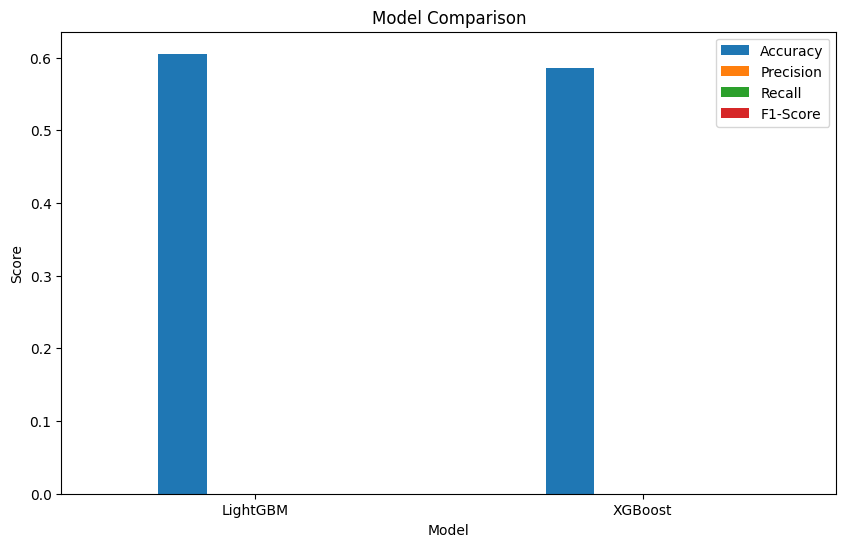

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume y_test is defined and contains the true labels for the test set
# Replace y_test with the true labels from your validation set or test set

# Calculate metrics for LightGBM
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_precision = precision_score(y_test, lgb_predictions)
lgb_recall = recall_score(y_test, lgb_predictions)
lgb_f1 = f1_score(y_test, lgb_predictions)

# Calculate metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

# Create a DataFrame to display metrics
metrics = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_accuracy, xgb_accuracy],
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1-Score': [lgb_f1, xgb_f1]
})

print(metrics)

# Optional: Visualize the metrics
metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()
